## Heart Disease Prediction using Machine Learning

![alt text](dataset-cover-1.jpg)

# Project Objective
Heart Disease Prediction using Machine Learning
Heart disease prevention is critical, and data-driven prediction systems can significantly aid in early diagnosis and treatment. Machine Learning offers accurate prediction capabilities, enhancing healthcare outcomes.
In this project, I analyzed a heart disease dataset with appropriate preprocessing. Multiple classification algorithms were implemented in Python using Scikit-learn and Keras to predict the presence of heart disease.

**Algorithms Used**:
- Logistic Regression
- Naive Bayes
- Support Vector Machine (Linear)
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- XGBoost
- Artificial Neural Network (1 Hidden Layer, Keras)

In [1]:
# Multiple Model test: Best Model Save(Best Score)

## Step 1 : Import Important Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
print('All Modules Loaded Successfully!')

All Modules Loaded Successfully!


## Step 2 : Loading Data

In [3]:
url = '''https://github.com/ankitmisk/Heart_Disease_Prediction_ML_Model/blob/main/heart.csv?raw=true'''
df = pd.read_csv(url)
print('Done')

Done


## Step 3 : Understanding Data using EDA

In [4]:
# 3.1 data head
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# 3.2 data tail
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# 3.3 data shape
df.shape

(303, 14)

In [7]:
# 3.4 data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# 3.5 data columns
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

###### 3.6 Column Desc
- **age**:			``age``
- **sex**:			``1: male, 0: female``
- **cp**:			``chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic``
- **trestbps**:			``resting blood pressure``
- **chol**:			`` serum cholestoral in mg/dl``
- **fbs**:			``fasting blood sugar > 120 mg/dl``
- **restecg**:			``resting electrocardiographic results (values 0,1,2)``
- **thalach**:			 ``maximum heart rate achieved``
- **exang**:			``exercise induced angina``
- **oldpeak**:			``oldpeak = ST depression induced by exercise relative to rest``
- **slope**:			``the slope of the peak exercise ST segment``
- **ca**:			``number of major vessels (0-3) colored by flourosopy``
- **thal**:			``thal: 3 = normal; 6 = fixed defect; 7 = reversable defect``

In [9]:
# Domain Knowledge is required for this level of project

3.7 : Checking Null Counts

In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 3.8 : Column stats

In [11]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


3.9 : Each column univariate analysis

In [12]:
for i in df:
    print(f'column_{i}',df[i].unique())
    print('---------------------')

column_age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
---------------------
column_sex [1 0]
---------------------
column_cp [3 2 1 0]
---------------------
column_trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
---------------------
column_chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307

3.10 : Each Numarical Features Hist Plot Distribution

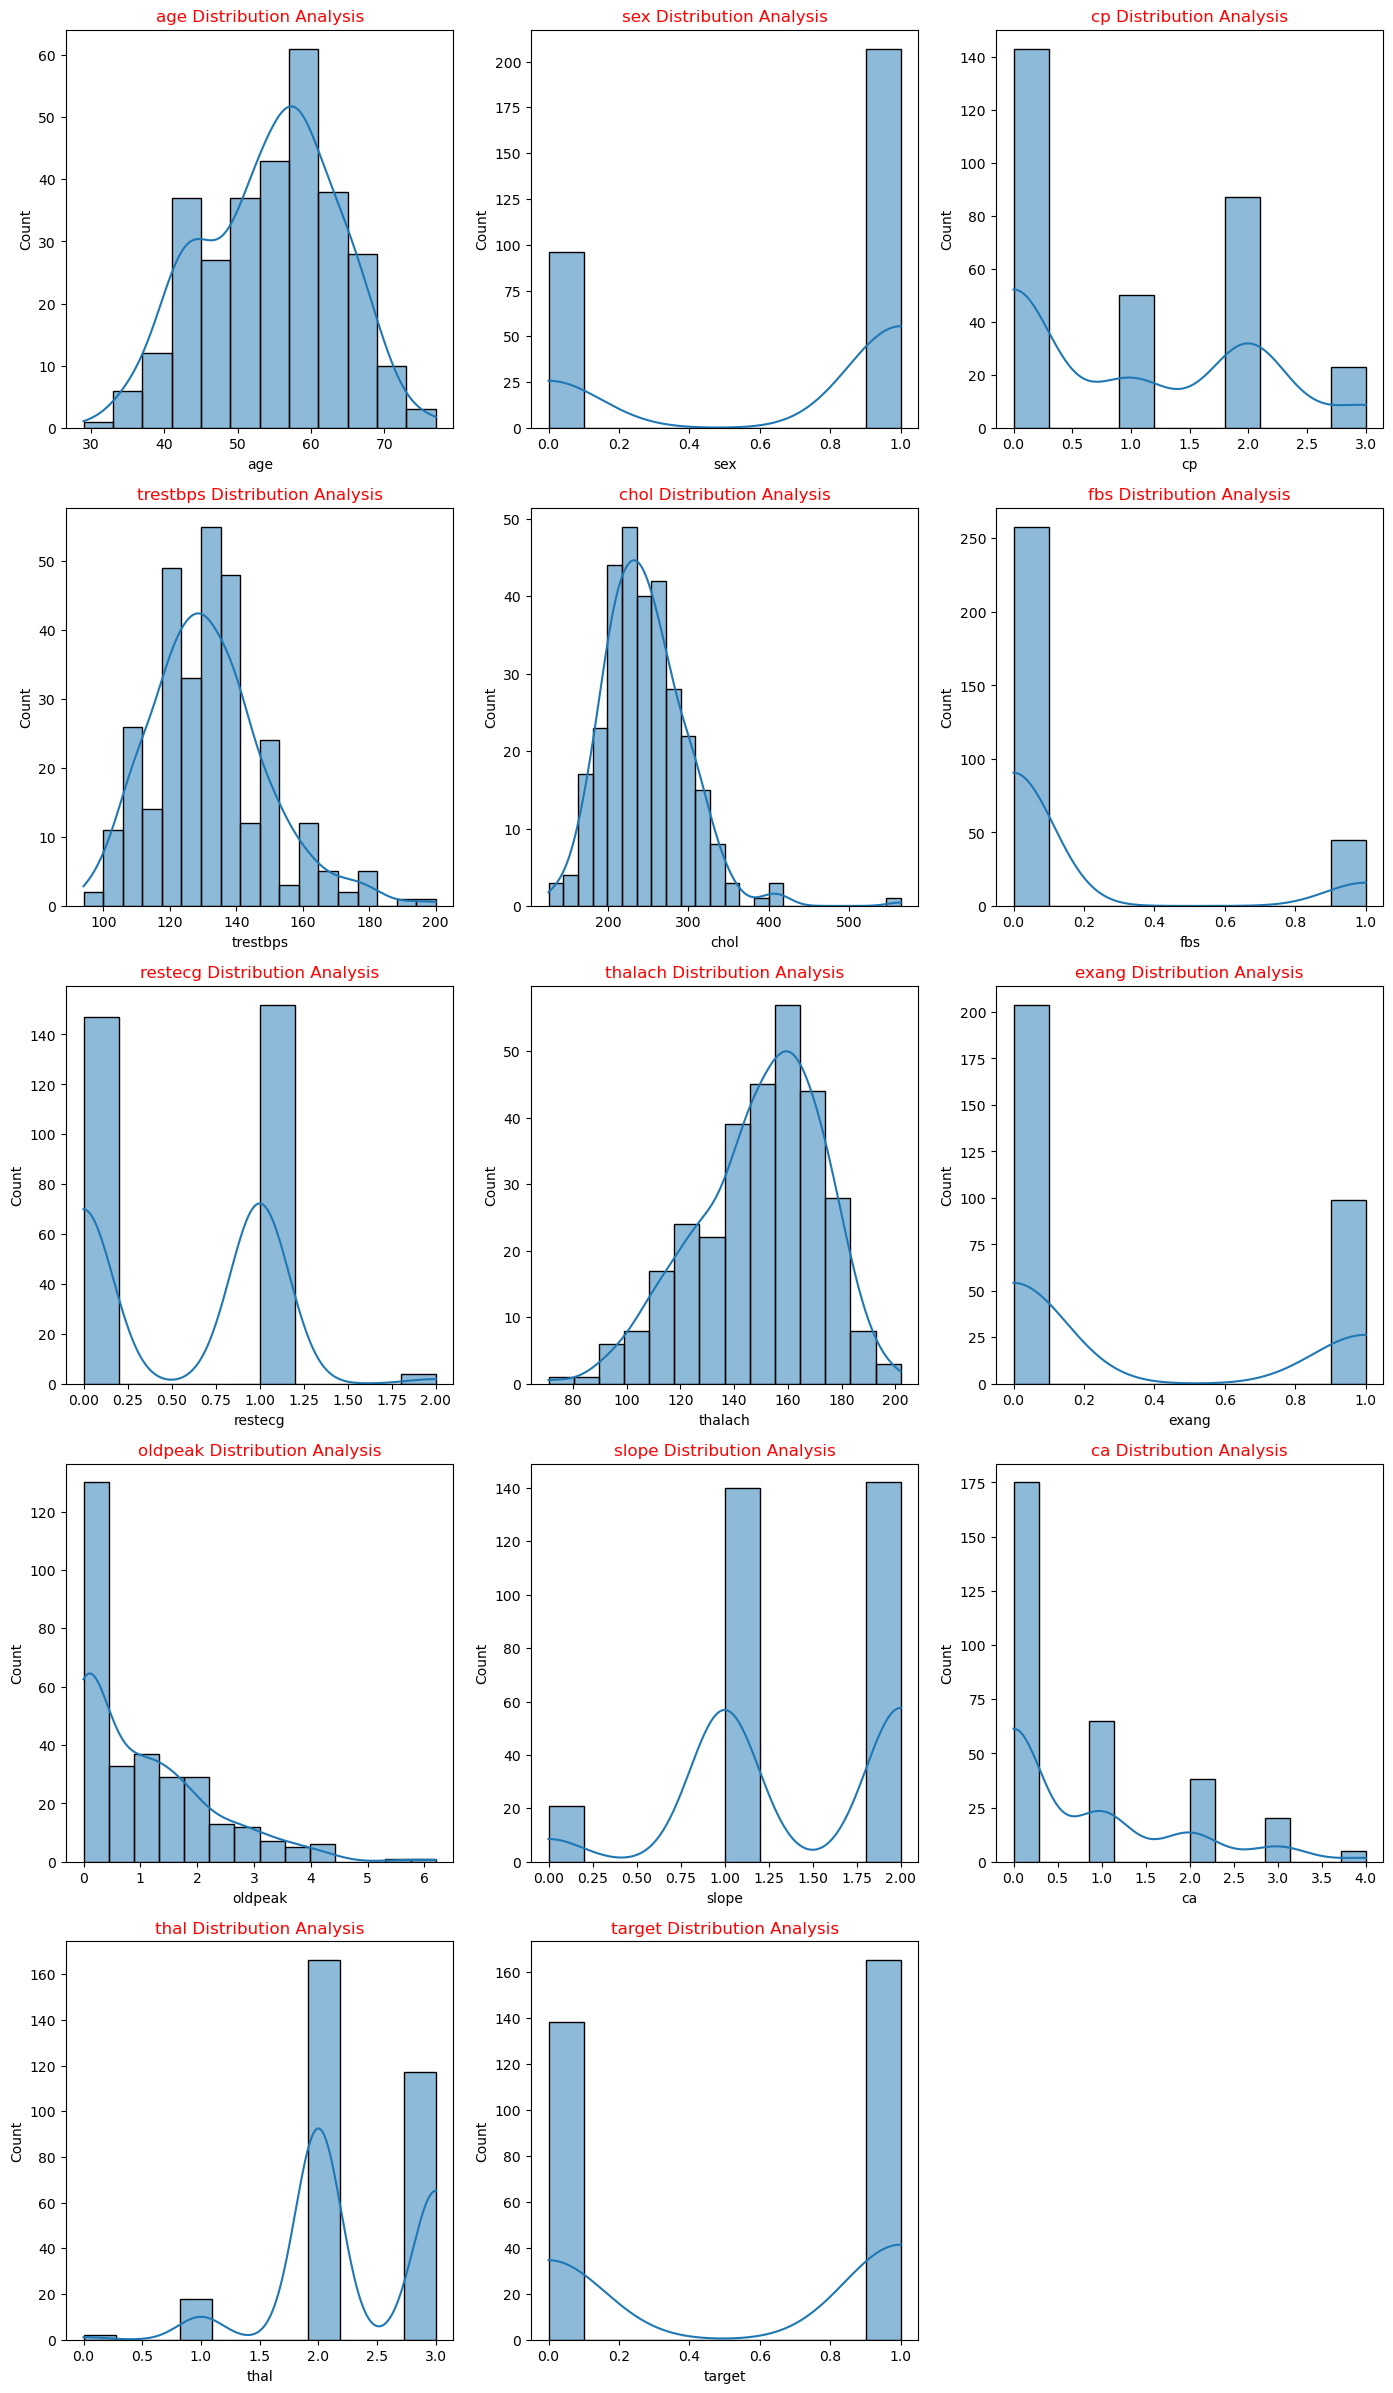

In [13]:
r = 5
c = 3
plt.figure(figsize=(17,30))
for i,j in enumerate(df):
    plt.subplot(r,c,i+1)
    plt.title(f'{j} Distribution Analysis',color='red')
    sns.histplot(df[j],kde=True)
plt.savefig('All Numarical Features Analysis.jpeg')
plt.show()

In [14]:
# Target col not that much imbalance, we can procced, if imbalance found we need to balance using sampling

3.11 : Bivariate Analysis, to check Correlation of features vs target

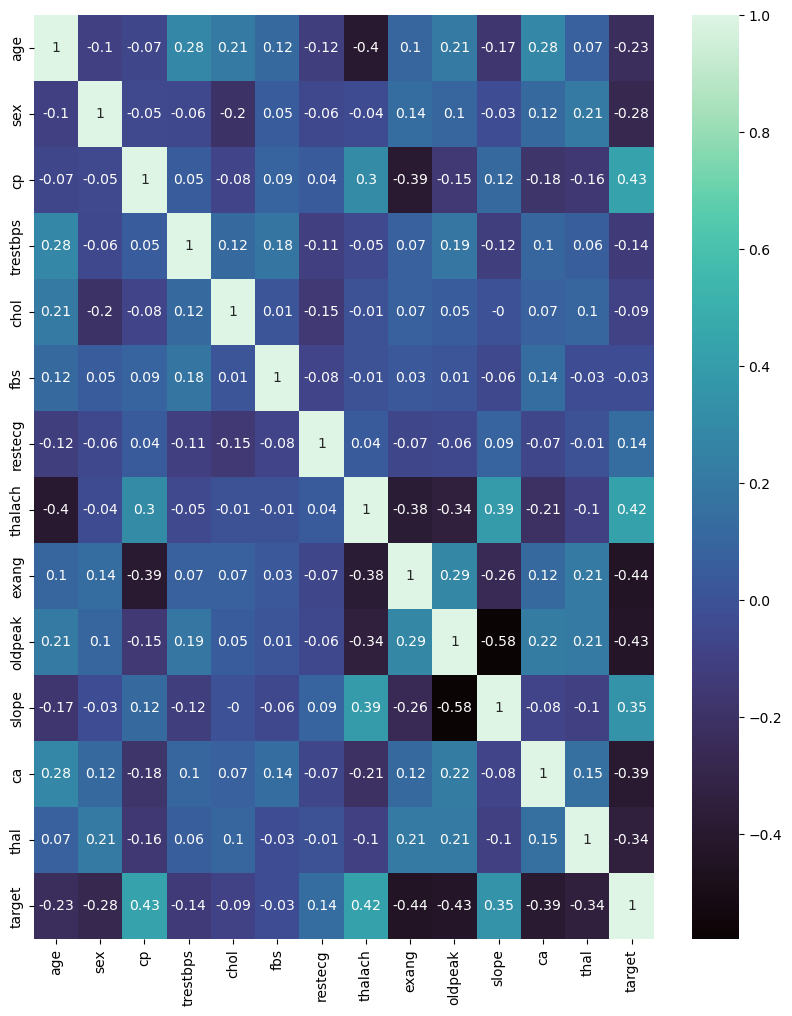

In [15]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr().round(2),cmap='mako',annot=True)
plt.show()

In [16]:
# "thalach" refers to the maximum heart rate achieved during exercise, specifically measured in beats per minute (bpm)
# Fasting blood sugar (FBS) levels, when elevated, can indicate an increased risk of heart disease
# "slope" usually refers to the ST/HR slope, which is a measurement derived from an exercise stress test used to assess the severity of coronary artery disease

3.12 : target vs faetures

In [17]:
df.corr()['target'].sort_values(ascending = False).reset_index()

,index,target
0,target,1.000000
1,cp,0.433798
2,thalach,0.421741
3,slope,0.345877
4,restecg,0.137230
5,fbs,-0.028046
6,chol,-0.085239
7,trestbps,-0.144931
8,age,-0.225439
9,sex,-0.280937


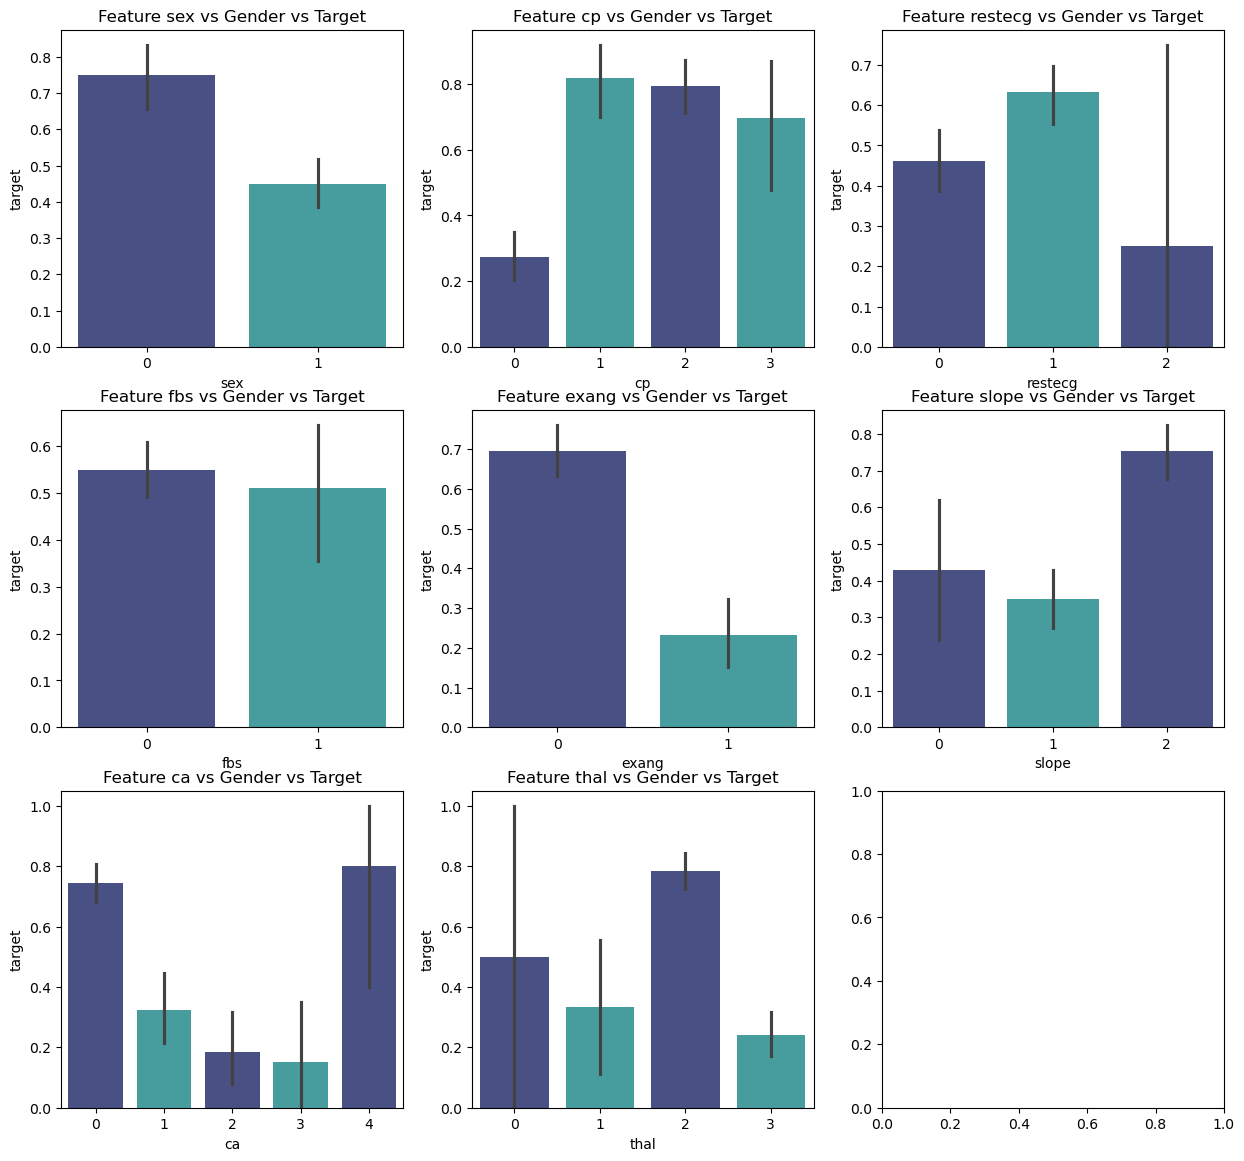

In [18]:
r = 3
c = 3
x_col = ['sex','cp','restecg','fbs','exang','slope', 'ca', 'thal']
plt.figure(figsize=(15,14))
for i in range(r*c):
    try:
        plt.subplot(r,c,i+1)
        plt.title(f'Feature {x_col[i]} vs Gender vs Target')
        sns.barplot(data = df, x = x_col[i], y = 'target', palette=sns.color_palette('mako',2))
    except:
        ...
plt.show()


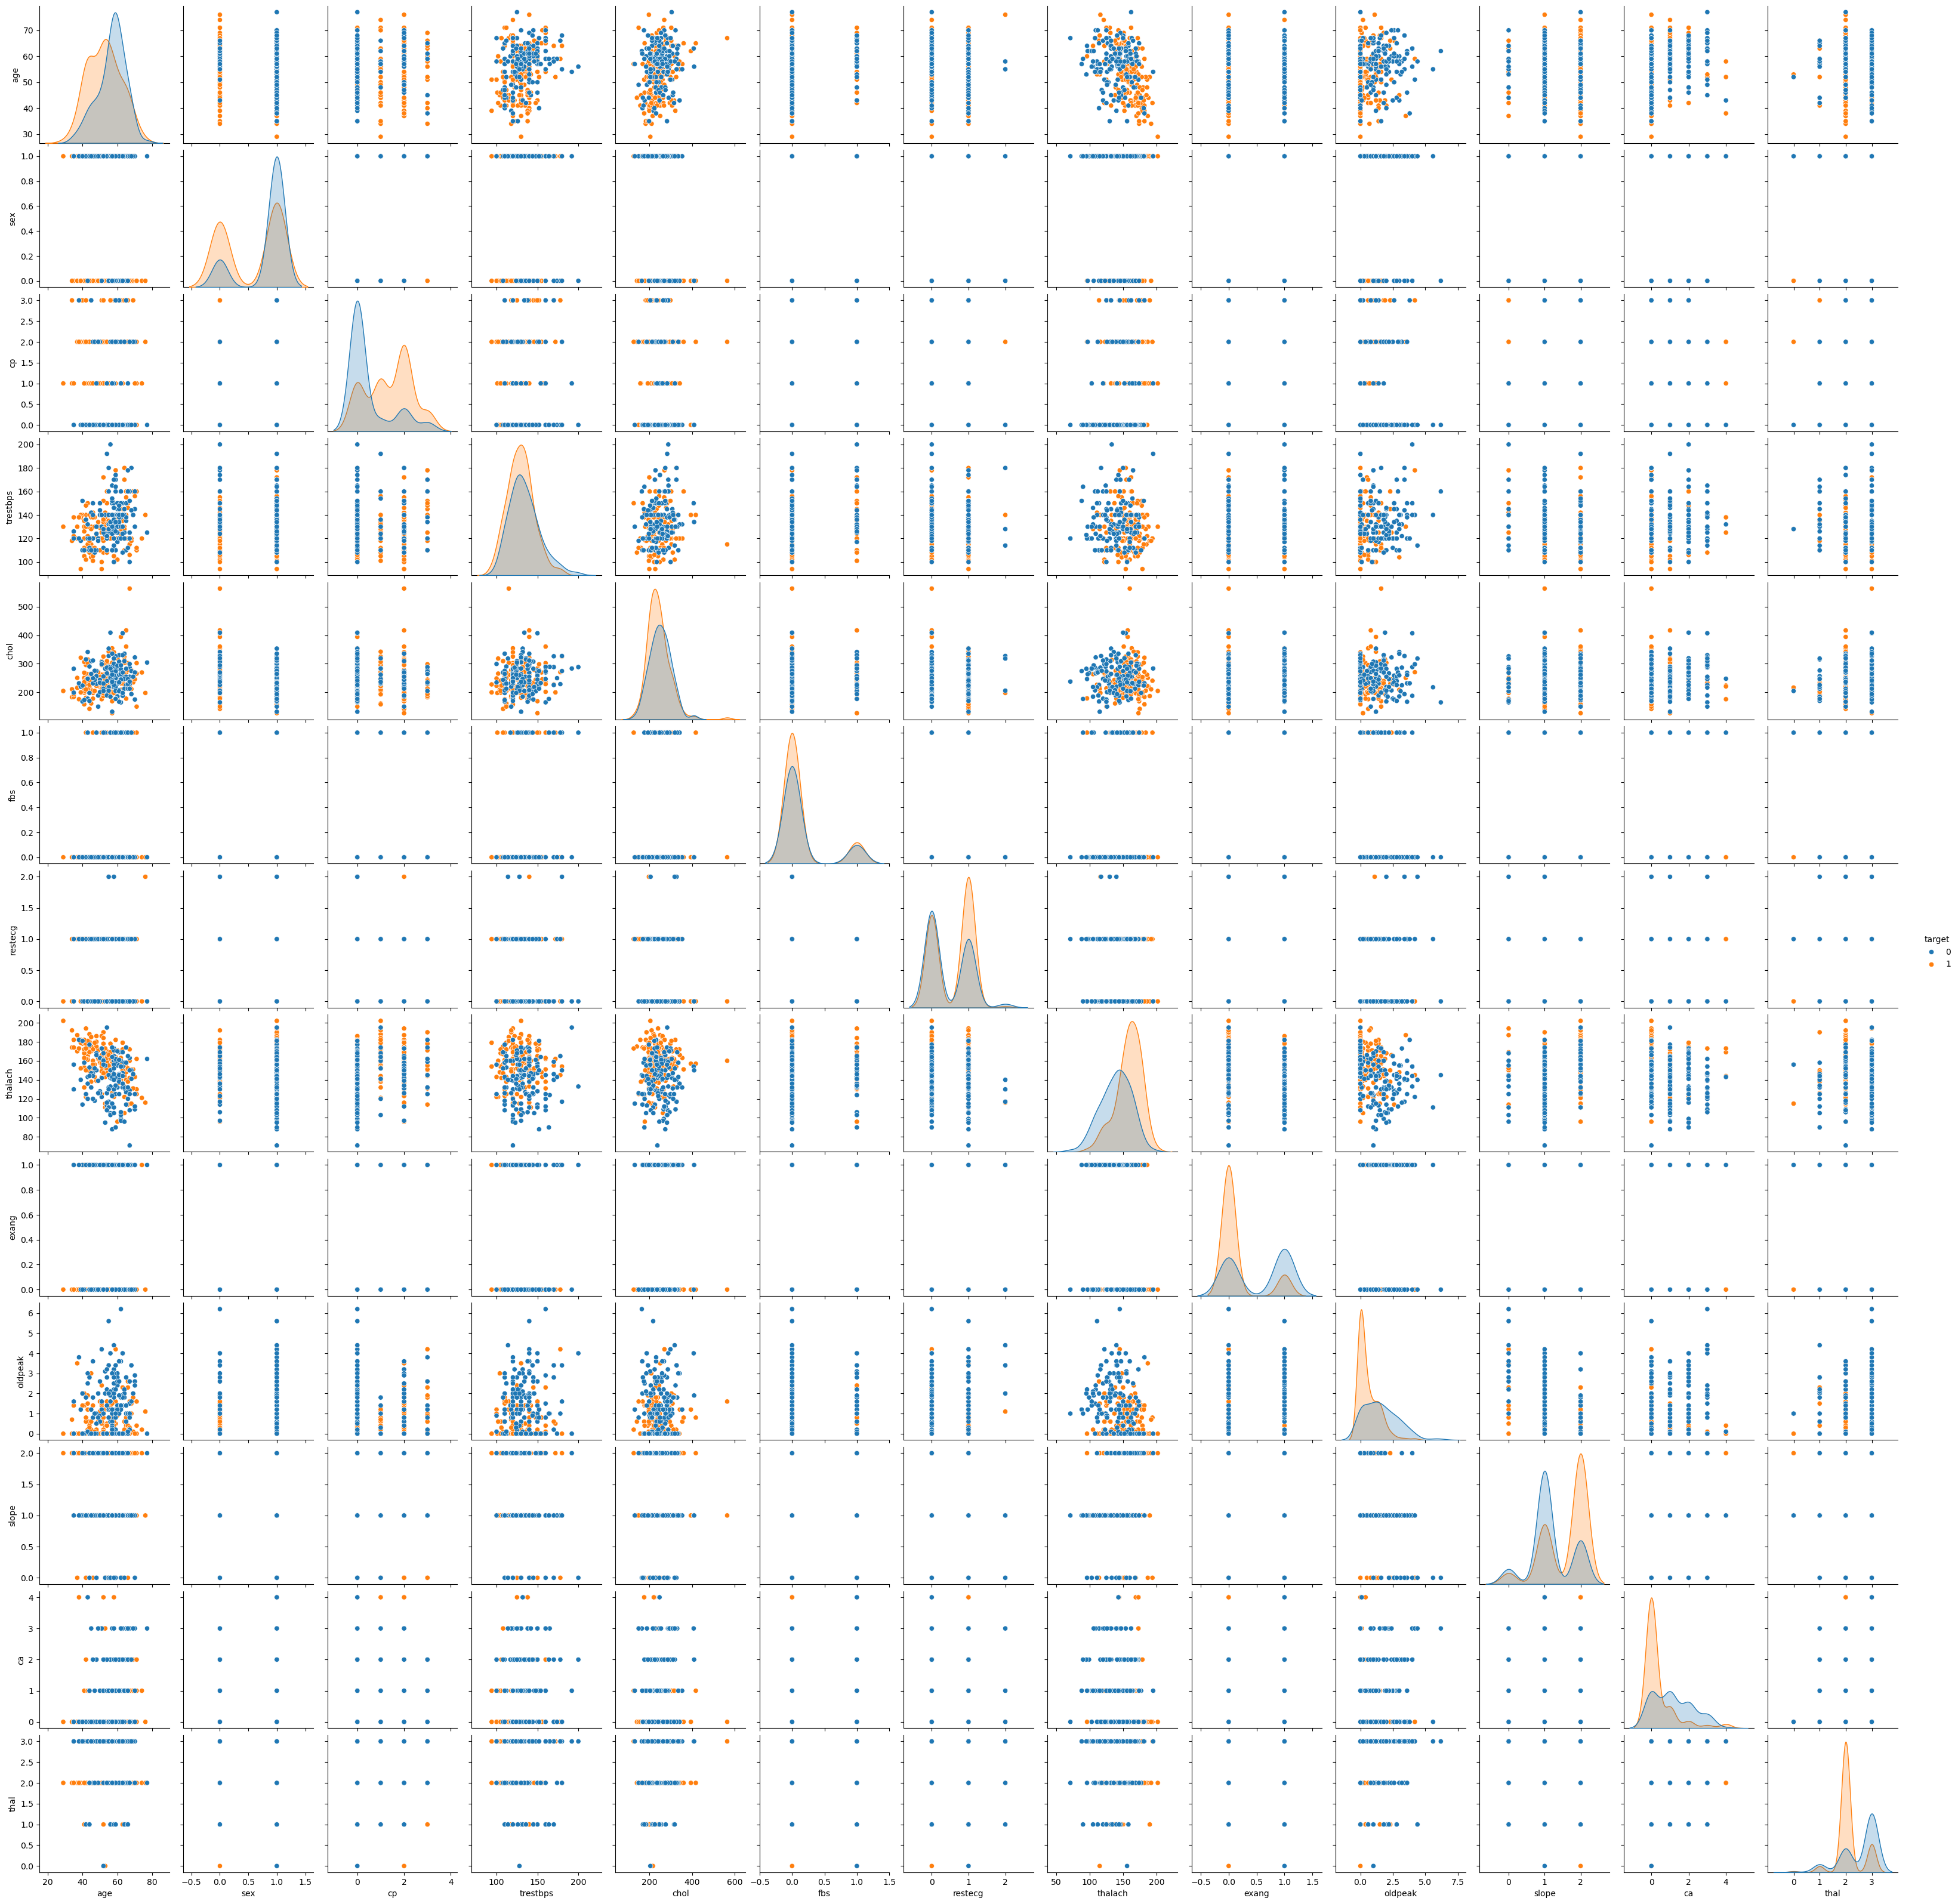

In [19]:
sns.pairplot(data = df, hue='target')
plt.show()

## Step 4 : Divide data into Train and Test

4.1 divide data inti target and features

In [20]:
X = df.iloc[:,:-1]
y = df['target']

In [21]:
X.shape, y.shape

((303, 13), (303,))

4.2 Train - test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


# Step 5 : Multiple Model Creation

In [24]:
# because target value : only : 0,1(Binary Classification),
# This is not a regression problem

5.1 Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression() # Model object
model_lr.fit(X_train,y_train) # Training/Model Building

LogisticRegression()

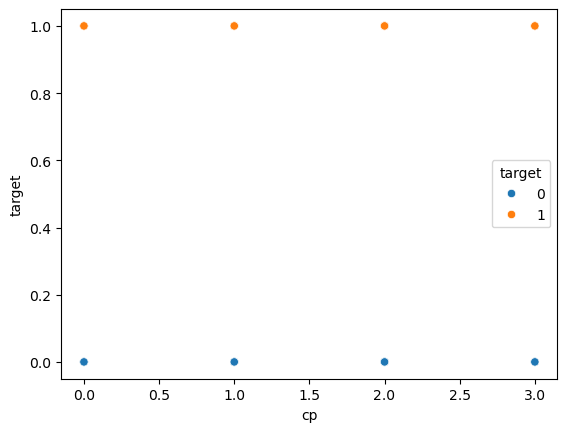

In [26]:
sns.scatterplot(data=df,x='cp',y = 'target', hue='target')
plt.show()

In [27]:
y_pred = model_lr.predict(X_test)
#y_pred

5.1.2 : Impact model evaluation metrices, it will be called only when problem is of classification

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

5.1.3 : Import Confusion matrix to evaluate classification

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(y_test,y_pred)

In [31]:
print(cm)

[[25  4]
 [ 3 29]]


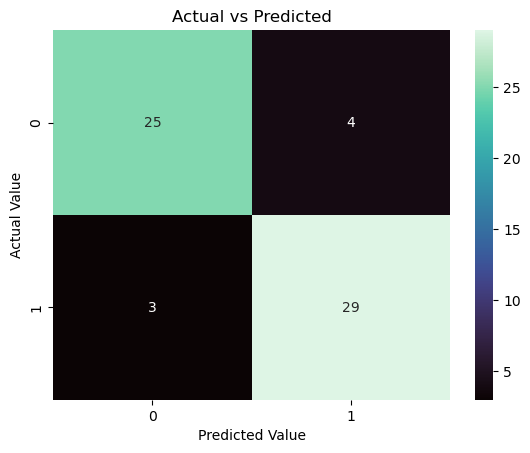

In [32]:
plt.title('Actual vs Predicted')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [33]:
cm.ravel()

array([25,  4,  3, 29])

In [34]:
TN,FP,FN,TP = cm.ravel()

In [35]:
precision_score(y_test,y_pred)

0.8787878787878788

In [36]:
ps = TP/(TP+FP)
ps

np.float64(0.8787878787878788)

In [37]:
rs = recall_score(y_test,y_pred)
print('Recall Score is:',rs)

Recall Score is: 0.90625


In [38]:
f1_sc = f1_score(y_test,y_pred)
print('F1 Score:',f1_sc)



F1 Score: 0.8923076923076924


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [40]:
f1_sc = f1_score(y_test,y_pred)
f1_sc

0.8923076923076924

5.1.4 : Checking Model Score

In [41]:
# Model Score same as accuracy score
lr_score = model_lr.score(X_test,y_test)
lr_score

0.8852459016393442

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Step 5.2 : Naive Bayes ML Model

In [43]:
# pre assumption: It will pre-assume no correlation b/w faetures

5.2.1 : Import Naive Model

In [44]:
from sklearn.naive_bayes import GaussianNB
# GaussianNB only be use in case of binary classification
# MultinomialNB : only be use in case of multi class classification 
model_nv = GaussianNB()
model_nv.fit(X_train,y_train) # Train part/Learning

GaussianNB()

In [45]:
y_pred = model_nv.predict(X_test)


In [46]:
nv_score = model_nv.score(X_test,y_test)
print("Naive Bayes Score",nv_score)

Naive Bayes Score 0.8688524590163934


In [47]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))


Accuracy Score:  0.8688524590163934
Precision Score:  0.9
Recall Score:  0.84375
F1 Score:  0.8709677419354839


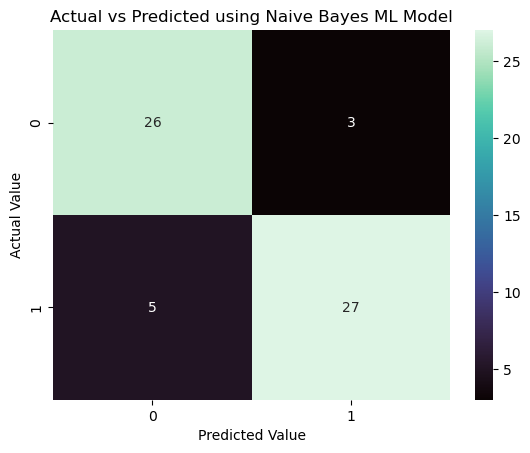

In [48]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

Step 5.3 : Support Vector Machine ML model


In [49]:
# SVM Works on Support vectos of nearest data points of different classes
# It will create line, plane or Hyperplane
# we can use this for both regression problems and classification(Binary/Multiclass)

Step 5.3.1 Import Svm Model 

In [50]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train,y_train)

SVC()

In [51]:
y_pred = model_svc.predict(X_test)

Step 5.3.3 Checking scores and confusion matrix


In [52]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))


Accuracy Score:  0.7049180327868853
Precision Score:  0.6666666666666666
Recall Score:  0.875
F1 Score:  0.7567567567567568


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



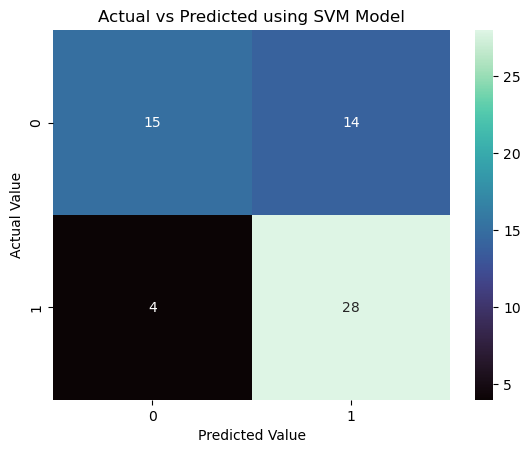

In [54]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using SVM Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [55]:
svm_score = accuracy_score(y_test,y_pred)

In [56]:
lr_score,nv_score,svm_score

(0.8852459016393442, 0.8688524590163934, 0.7049180327868853)

Step 5.4 Decision Tree ML Model

In [57]:
# Sepal length , Sepal width, Petal length, Petal width
# Types of Iris 
# Iris Versicolor , Iris Setosa, #Iris Virginica
# Decision node - 

Step 5.4.1 Import Decision Tree Model

In [58]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

5.4.2 : Predict Model y_pred

In [59]:
y_pred = model_dt.predict(X_test)

In [60]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))


Accuracy Score:  0.8360655737704918
Precision Score:  0.8928571428571429
Recall Score:  0.78125
F1 Score:  0.8333333333333334


In [61]:
from sklearn.tree import plot_tree

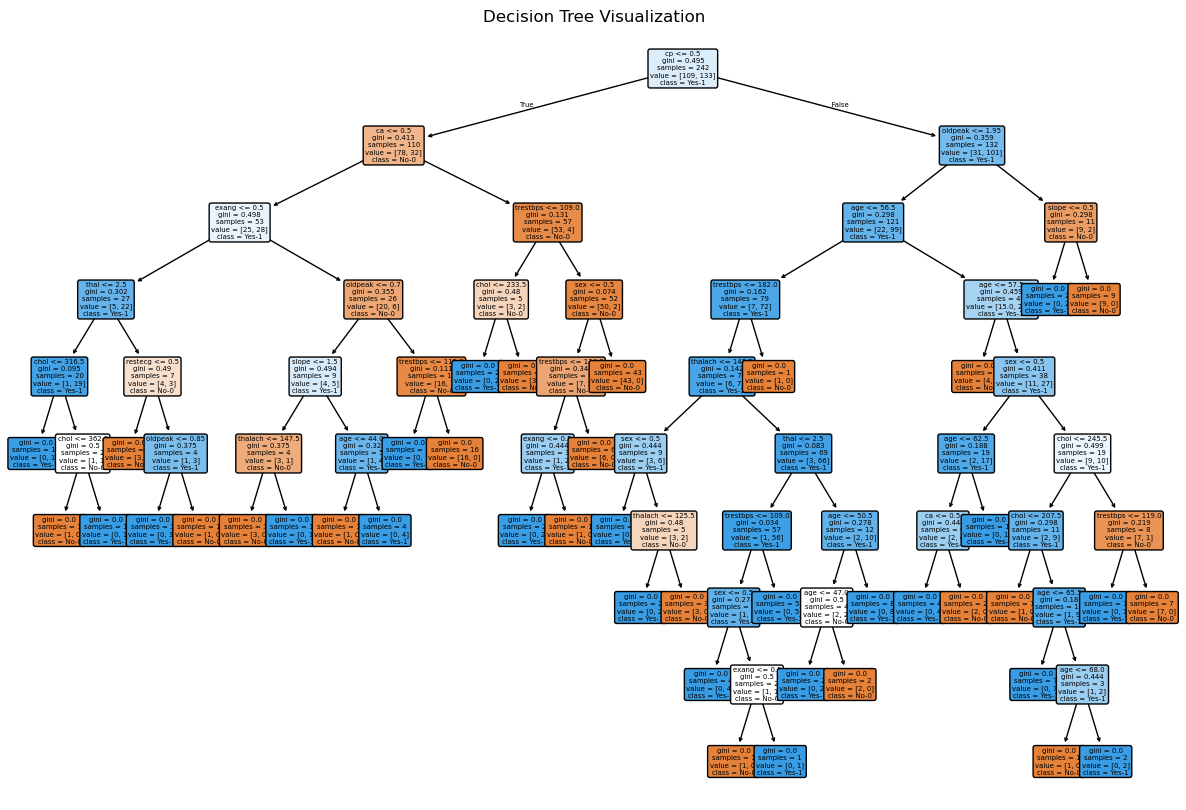

In [62]:
plt.figure(figsize=(15, 10)) # Adjust figure size for better readability
plot_tree(model_dt,
          feature_names=X.columns,
          class_names=['No-0','Yes-1'],
          filled=True, # Color nodes based on class
          rounded=True, # Round node corners
          fontsize=5) # Adjust font size

plt.title("Decision Tree Visualization")
plt.show() # Display the plot

In [63]:
dt_score = accuracy_score(y_test,y_pred)
dt_score

0.8360655737704918

# Step 5.5 : Ensemble Leraning ML Model 
* Bagging technique : bags of multiple ML model, and each model give its prediction/classification final outcome based on majority.
* Boosting Technique : Next model learn from previous model and boost the next model.

Step 5.5.1 Bagging Technique mode > Random

In [64]:
# Random Forest regression problem: Avg of Final value>> 2.2 + 2.4 + 2.5>> 2.36
# Random Forest Classification>> Binary/Multiclass classification >> Majority Voting

Step 5.5.2 Import Random forest model

In [65]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=200)
model_rf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=200)

In [66]:
y_pred = model_rf.predict(X_test)

In [67]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))


Accuracy Score:  0.8688524590163934
Precision Score:  0.875
Recall Score:  0.875
F1 Score:  0.875


In [68]:
rf_model = accuracy_score(y_test,y_pred)
rf_model

0.8688524590163934

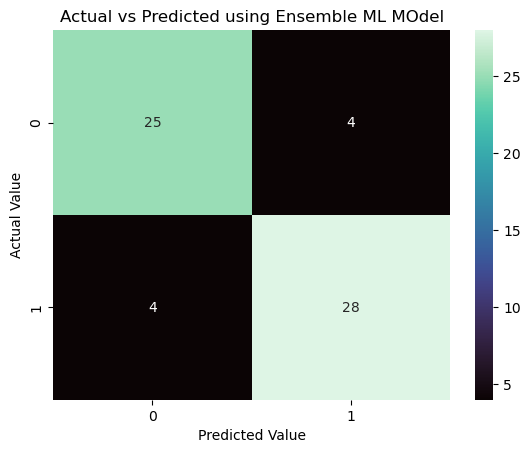

In [69]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using Ensemble ML MOdel')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

Emsemble Boosting technique : Adaboost, Gradientboost, XGboost

In [70]:
# Adaboost: Adaptive Boosting
# Gradientboost: GBM
# LBM: Gradientboost: LGBM
# XGboost: Extreme Gradient Boosting:
# Catboost: Categorical: textual data:

In [71]:
from IPython.display import Image, display

# Your image URL
url = 'https://ars.els-cdn.com/content/image/1-s2.0-S1568494623000844-gr6.jpg'

# Display the image
display(Image(url=url, width=400))

Step 5.6.1 : Import XGBoost ML Algorithm

In [72]:
#pip install xgboost

In [73]:
import xgboost

In [74]:
from xgboost import XGBRFClassifier
model_xgb = XGBRFClassifier()
model_xgb.fit(X_train,y_train) # None : Hyperparameters : Model fine tune

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, ...)

In [75]:
y_pred = model_xgb.predict(X_test)

In [76]:
xgb_score = accuracy_score(y_test,y_pred)

In [77]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))


Accuracy Score:  0.8032786885245902
Precision Score:  0.8333333333333334
Recall Score:  0.78125
F1 Score:  0.8064516129032258


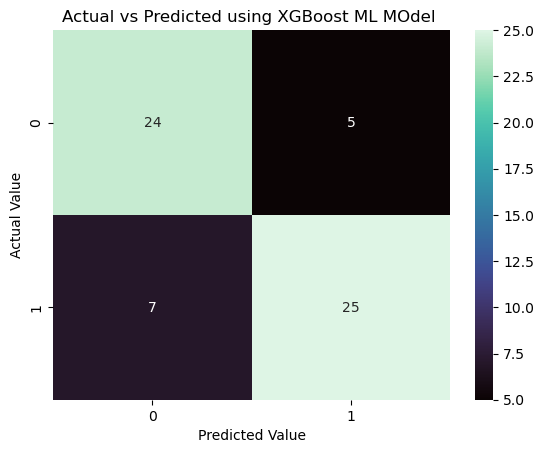

In [78]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using XGBoost ML MOdel ')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

# Step 5.7 KNN : K Nearest Neighbour ML Model

In [79]:
# import KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=14)
model_knn.fit(X_train,y_train) 

KNeighborsClassifier(n_neighbors=14)

In [80]:
y_pred = model_knn.predict(X_test)

In [81]:
knn_score = accuracy_score(y_test,y_pred)
knn_score

0.7377049180327869

In [82]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))


Accuracy Score:  0.7377049180327869
Precision Score:  0.7666666666666667
Recall Score:  0.71875
F1 Score:  0.7419354838709677


In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.77      0.72      0.74        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



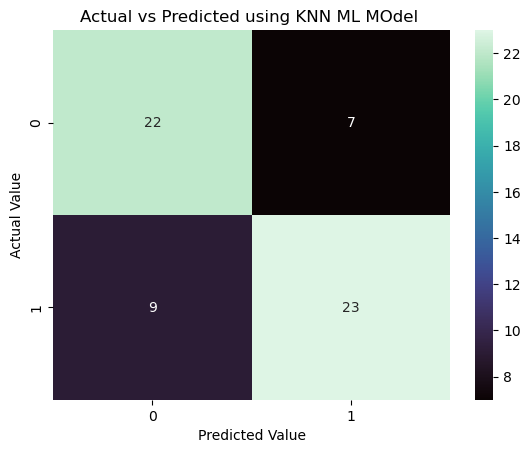

In [84]:
cm = confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted using KNN ML MOdel ')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

# Step 5.8 Artificial Neural Network using Deep Learning

In [85]:
# ML works only on Limited data
# If Input Changes ML Model fail(8 Features col: 8)

In [86]:
from IPython.display import Image, display

# Your image URL
url = 'https://editor.analyticsvidhya.com/uploads/94912bosem.png'

# Display the image
display(Image(url=url, width=400))

In [87]:
from IPython.display import Image, display

# Your image URL
url = 'https://media.licdn.com/dms/image/v2/D4D12AQH2F3GJ9wen_Q/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1688885174323?e=2147483647&v=beta&t=dY_S6xeNsRCIvpIrjrPFzq8qgHPgmP4e_HLaA15ufPM'

# Display the image
display(Image(url=url, width=400))

Step 5.8.1 ANN Model Creation

In [88]:
#pip install keras

In [89]:
#pip install tensorflow

In [90]:
from keras.models import Sequential
from keras.layers import Dense

In [91]:
model = Sequential()  # Step 1 Sequential model creation
model.add(Dense(11,activation='relu',input_dim=13)) # Dense Layer
model.add(Dense(1,activation='sigmoid')) # Output will be 1 Neuron for Binary

model.compile(loss='binary_crossentropy',  # loss to calculate model loss
              optimizer='adam', #optimizer to optimize model learning
              metrics=['accuracy'])  #  metrics return accuracy score

print('Done')

Done


5.8.3 Model Training

In [92]:
model.fit(X_train,y_train,epochs=300) # iteration during retraing : epochs = 300

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4504 - loss: 65.9809
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4504 - loss: 59.7389 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4504 - loss: 53.2416 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4504 - loss: 46.7592 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4504 - loss: 40.1994 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4504 - loss: 33.3799 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4504 - loss: 26.6124  
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4504 - loss: 19.9056
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4504 - loss: 13.1305 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4545 - loss: 6.5774 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5909 - loss: 2.7276 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5

Step 5.8.4 pred y_pred

In [93]:
y_pred = model.predict(X_test)
y_pred = [round(i[0])for i in y_pred]
y_pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


[0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0]

In [94]:
ann_score = accuracy_score(y_test,y_pred)
ann_score

0.8524590163934426

# Step 6 : All Model Comparison 

In [95]:
all_model_score  = [lr_score,nv_score,svm_score,dt_score,rf_model,xgb_score,knn_score,ann_score]
model_name = ['Logistic','Naive','SVM','Decision Tree','Random Forest','XGB','Knn','ANN']

print('Done')

Done


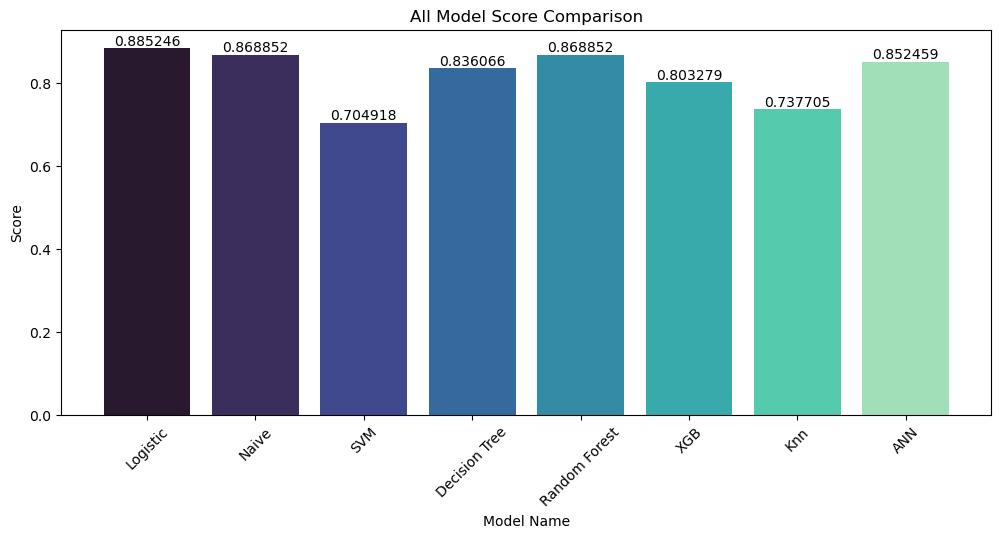

In [96]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

# Step 7 Best Model Save

In [97]:
import pickle
with open('heart_disease_pred.pkl','wb') as f:
    pickle.dump(model_lr,f)
print('done')

done
